In [27]:
# -*- coding: utf-8 -*-
"""
Created on Mon Aug  2 10:44:39 2021

@author: N.Poonkie.Ts'oeute
"""

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from IPython.display import display
from ipywidgets import widgets
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [10]:
mydata = pd.read_csv("diabetes.csv")
mydata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
#checking if there are missing values
mydata.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
#cleaning dataset after checking for missing values

mydata["Glucose"] = mydata["Glucose"].replace(0,mydata["Glucose"].mean())
mydata["BloodPressure"] = mydata["BloodPressure"].replace(0,mydata["BloodPressure"].mean())
mydata["SkinThickness"] = mydata["SkinThickness"].replace(0,mydata["SkinThickness"].mean())
mydata["Insulin"] = mydata["Insulin"].replace(0,mydata["Insulin"].mean())
mydata["BMI"] = mydata["BMI"].replace(0,mydata["BMI"].mean())
mydata["Age"] = mydata["Age"].replace(0,mydata["Age"].mean())

In [13]:
#splitting my dataset into testing and training
X = mydata.drop(["Outcome"], axis=1)
y = mydata["Outcome"]
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.8, random_state=42)


In [14]:
#model creation
model= LogisticRegression()
model.fit(X_train,y_train)

model.score(X_test, y_test)


/home/meshack/anaconda3/envs/cancerpro/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7792207792207793

In [15]:
probs = model.predict_proba(X_test)

In [16]:
probs = probs[:, 1]

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

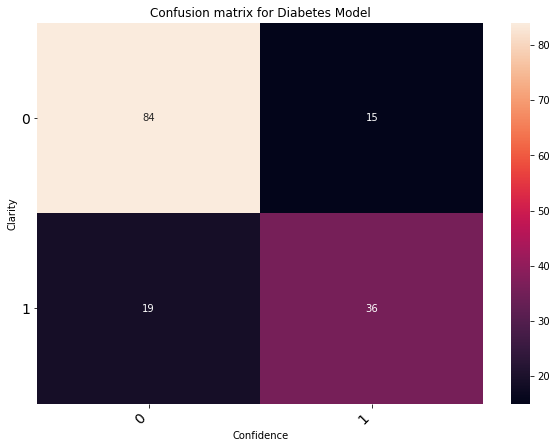

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = model.predict(X_test)

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index = class_names, columns = class_names,
        )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap (df_cm, annot = True, fmt = "d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize = fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = fontsize)
    plt.title('Confusion matrix for Diabetes Model')
    plt.ylabel('Clarity')
    plt.xlabel('Confidence')
cm = confusion_matrix(y_test,predictions)

print_confusion_matrix(cm,["0", "1"]) 


In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



In [21]:

#Defining a sample data to test the model
x=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
data=[0,170,126,60,35,30.1,0.649,78]
paitentid_54=pd.DataFrame([data],columns=x)
paitentid_54.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,170,126,60,35,30.1,0.649,78


In [22]:
predictions_diabetes=model.predict(paitentid_54)
print(predictions_diabetes)

[1]


In [32]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

In [28]:
#Defining a python function to plot the ROC curves.
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

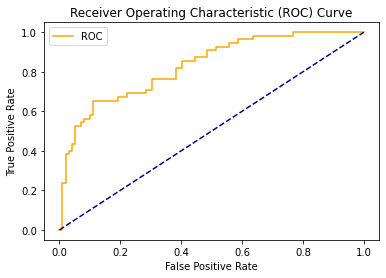

In [30]:
plot_roc_curve(fpr, tpr)

In [36]:
#display button 
button = widgets.Button(description="Display")
display(button)

def on_button_clicked(b):
    print(mydata.head())

button.on_click(on_button_clicked)


Button(description='Display', style=ButtonStyle())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [35]:
button1 = widgets.Button(description="Dataset Info")
display(button1)

def button_clicked(a):
    print(mydata.info())

button.on_click(button_clicked)

Button(description='Dataset Info', style=ButtonStyle())